In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Creating array of uniform random numbers

In [2]:
np.random.uniform(low=0,high=1,size=12)

array([ 0.52475865,  0.43051664,  0.08582373,  0.37034492,  0.60998227,
        0.46081716,  0.1309392 ,  0.18283697,  0.83419927,  0.91788797,
        0.19770013,  0.14993294])

## Creating array of Gaussian random numbers

In [3]:
np.random.normal(loc=0.0,scale=1.0,size=12)

array([-0.99569636,  0.43678617, -0.69360115,  0.90582207, -0.20598606,
        1.30235962,  2.06334435,  0.42438706, -0.64816887,  1.37365725,
       -1.18913899, -0.69337629])

## Histogram representation of pdf

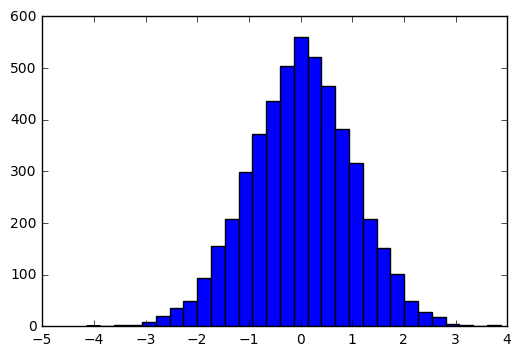

In [6]:
N = 5000
mu = 0.0 # mean
sigma = 1.0  # standard dev
X = np.random.normal(loc=mu, scale=sigma, size=N)
_,_,_ = plt.hist(X, 30)
plt.show()

## Fitting Gaussian Distribution to Data

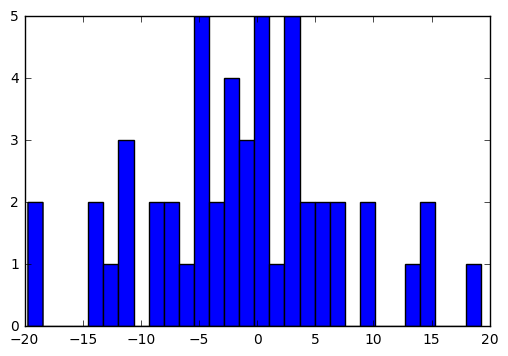

In [9]:
X=np.random.normal(loc=2.3,scale=8.7,size=50)
mean=np.mean(X)
stdev=np.std(X)
_,_,_ = plt.hist(X, 30)
plt.show()


Recall the pdf of the normal distribution is given by

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left({-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}\right)$$


Plugging in the standard deviation and mean as calculated from the data, we can compare the curve to the calculated values, and the actual pdf.

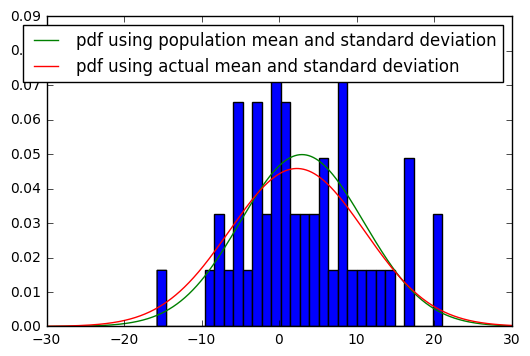

2.95561725724
7.99603142037


In [20]:
X=np.random.normal(loc=2.3,scale=8.7,size=50)
mean=np.mean(X)
stdev=np.std(X)
_,_,_ = plt.hist(X, 30,normed=True)
x=np.linspace(-30,30,10000)
plt.plot(x,1/np.sqrt(np.pi*2*stdev**2)*np.exp(-1/2*((x-mean)/stdev)**2),color='green',label='pdf using population mean and standard deviation')
plt.plot(x,1/np.sqrt(np.pi*2*8.7**2)*np.exp(-1/2*((x-2.3)/8.7)**2),color='red',label='pdf using actual mean and standard deviation')
plt.legend()
plt.show()
print(mean)
print(stdev)

# Other types of distributions

Consider the $\chi_N^2$ distribution. It is formed by taking the squares of $N$ standard normal random variables. 

Let $N=2$. 


In [26]:
X1=np.random.normal(loc=0,scale=1,size=50000)
X2=np.random.normal(loc=0,scale=1,size=50000)
X=X1**2+X2**2

array([ 0.79071415,  0.5880535 ,  0.77202704,  5.84941347,  4.46932088,
        1.43463348,  1.65823688,  0.78024371,  5.87895984,  0.62772108,
        4.46364675,  0.53324195,  5.20400091,  0.76529842,  1.8977882 ,
        1.30077687,  5.95837527,  5.57367808,  3.50616533,  0.24889737,
        2.51020566,  0.13469392,  1.61492444,  1.98724165,  0.49858439,
        0.83658354,  0.33404275,  0.34781042,  1.12598828,  2.26226582,
        4.57923502,  0.84660261,  0.64166869,  2.80038445,  3.32789344,
        0.09967853,  8.30569243,  0.84256207,  1.69387682,  1.31237486,
        0.91030433,  2.56754876,  0.49175322,  1.76960553,  0.53104887,
        2.37766565,  1.1329252 ,  1.03463397,  8.89333427,  0.16118311])

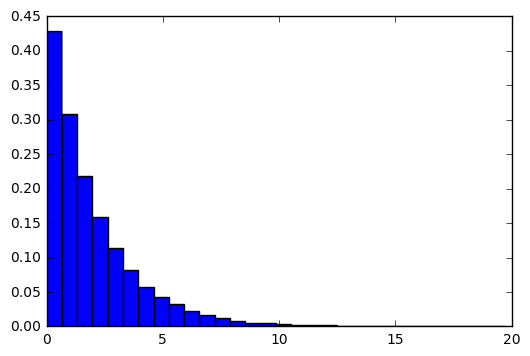

In [27]:
_,_,_ = plt.hist(X, 30,normed=True)
plt.show()

## PDF of $\chi_N^2$

The pdf of the $\chi_N^2$ distribution is 

$f(x,N)=\frac{x^{\frac{N}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{N}{2}}\Gamma(\frac{N}{2})}$, for $x>0$.

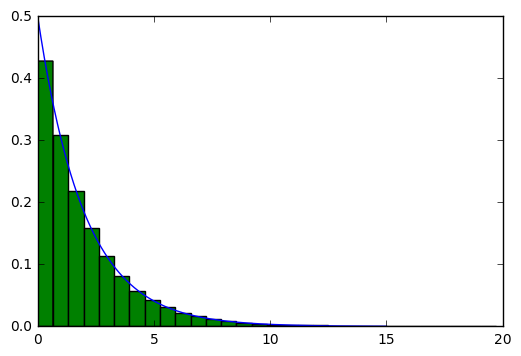

In [32]:
x=np.linspace(0,15,10000)
plt.plot(x,np.exp(-x/2)/(2))
_,_,_ = plt.hist(X, 30,normed=True)
plt.show()

$\chi^2$ distributions are frequently used in statistics to test hypotheses.

# Example Random Simulation

Suppose that you have to call your insurance agent. You are immediately put on hold. Suppose that if you are not at the phone when your call is accepted, you are immediately hung up on. Assume the hold waiting times are normally distributed with mean 15 minutes, and standard deviation 8 minutes. You are a busy person, and start making cookies while you  wait. Determine how long you have until you need to pay attention to the phone, if you want to catch an agent 75% of the time.

9.65181961694


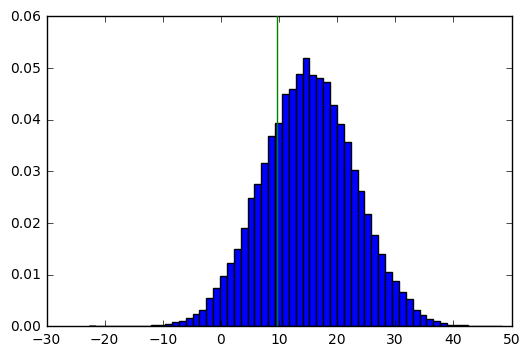

In [50]:
import random
time_till_next_bus = 50
mu = 15  # average wait time
sigma = 8
N = 50000  # number of simulations

average_waiting_times = list(np.random.normal(loc=mu,scale=sigma,size=N))


# We want to catch the call 75% of the time
average_waiting_times.sort()
print(average_waiting_times[N//4])
_,_,_ = plt.hist(average_waiting_times, 60,normed=True,zorder=1)
plt.axvline(x=average_waiting_times[N//4-1],color='green',zorder=4)
plt.show()

# Random Walks


Suppose a drunkard is standing at the origin in $\mathbb{R}$. At each time step, he goes 1 unit to the left with probability $p = 0.5$ or 1 unit to the right with probability $1-p = 0.5$. Let the length of his walk (number of time steps) be denoted by $M$, where $M \leq 100$. An example simulation of the drunkards's walk is [1,0,1,2,1,0,-1,-2,...,-3].Let's make a numpy array of shape (1000,100) and fill it with simulated random walks each consisting of 100 time steps. Please see here for more background details.

In [57]:
import numpy as np
import random

random.seed(42)

def get_step():
    return -1 if random.random() < 0.5 else 1
    # could have used random.choice([-1,1])

max_M = 300  # max length (# steps) of random walk
N = 1000  # number of walks

x = np.zeros([N,max_M+1]) # trajectories

# fill the array with simulated trajectoies
for i in range(N): # choose a particular trajectory
    for j in range(1,max_M+1): # construct the trajectory
        x[i,j] = x[i,j-1] + get_step()
    
print(x[:10])

[[  0.   1.   0. ...,  -2.  -3.  -2.]
 [  0.   1.   2. ...,  10.   9.  10.]
 [  0.  -1.   0. ...,  14.  15.  16.]
 ..., 
 [  0.   1.   2. ..., -10.  -9.  -8.]
 [  0.   1.   2. ...,   2.   1.   0.]
 [  0.  -1.   0. ...,   0.  -1.  -2.]]


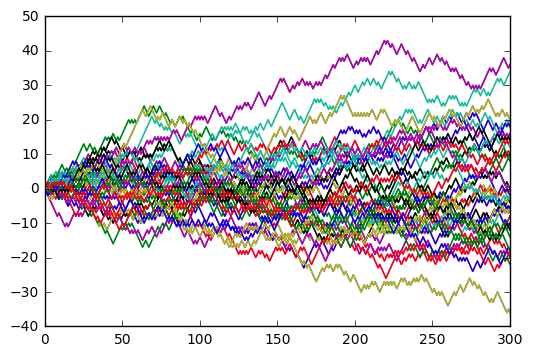

In [53]:
for i in range(40):
    plt.plot(range(max_M+1), x[i,:])
plt.show()

These random walks can be thought of as Gaussian "White Noise". They are used for many applications. For example, time series analysis.

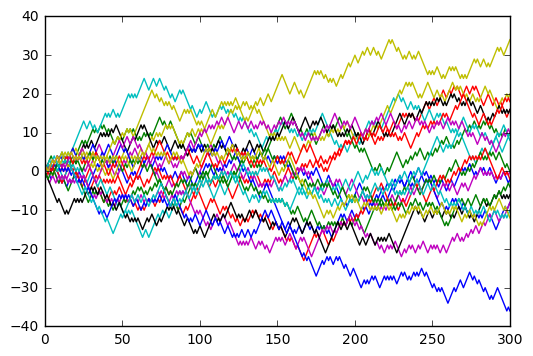

In [55]:
for i in range(20):
    plt.plot(range(max_M+1), x[i,:])
plt.show()

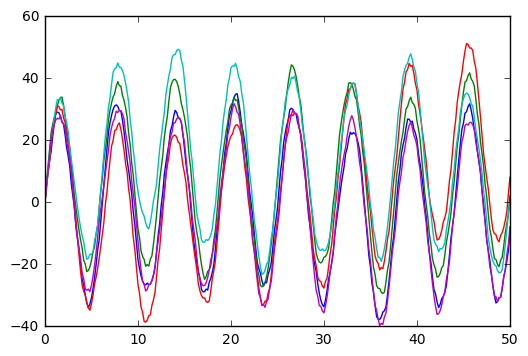

In [67]:
#Let's shorten the scale on which we are looking, to 50, and it to a sin curve
X=np.linspace(0,50,301)
y=30*np.sin(X)

for i in range(5):
    plt.plot(X, (y+x)[i,:])
plt.show()


For example, weather can be modeled as a time series plus noise. Take the temperature at the same time each day, and you obtain a cyclical pattern similar to the sine curve. However, the temperature varies wildly each day, so we can view the weather as cylical plus a white noise factor

# What happens if we average the results

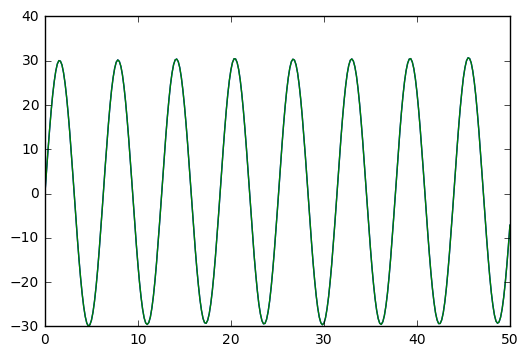

In [74]:
Y=x+y
Y.shape
Y=np.mean(Y,axis=0)
Y.shape
plt.plot(X, Y)
plt.show()